# 개요 
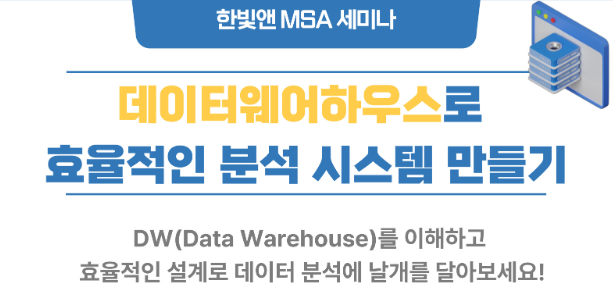

* 한빛앤 데이터 웨어하우스 세미나 다녀와서 정리
* 데이터 웨어하우스라는 단어는 많이 들어봤지만 와닿지 않았는데, DW개념이해가 필요한 비전공자 대상이라고 하여 참가함
  * 다만 SQLD를 공부하지 않았다면 초중반부터는 이해가 어려웠겠다라는 생각이 들었는데, 어차피 이런 세미나는 관심있는 사람만 들어서 괜찮을 듯 했음
  * 단어 자체만 기억나는 경우가 많아 따라가기 급급했지만, 결론적으로 재밌는 걸 많이 알게되어 좋았음
* 강연자이신 강성욱님이 시니어 DB Ops로 소개되었는데, 자주보이던 Ops라는 단어도 간략히 어떤 개념이구나 알게 되었음
  * Ops : Silo현상의 해결을 위해 개발과 운영의 통합
* 신청해 둔 다른 스터디에서 spark와 airflow를 다룰 예정이라, 관련 내용을 좀 더 이해하게 되지 않을까 기대됨
* 차원얘기가 나왔는데, AI관련 스터디에서 차원축소 관련 언급때 나온 희소성이 다시 생각나면서 좀 더 이해가 높아지는 계기가 되었음
* 이해되는 기준으로 정리했는데, 향후 다시보기를 통해 보완 예정

# 강연내용 정리

## 서론
* 데이터 분석의 8할은 데이터 가공이다
* Data-driven을 위해 빅데이터 시스템이 꼭 필요한가?
  * 데이터의 `품질`이 중요함 (많더라도 쓸모가 없으면 의미없음)
    * '데이터(비즈니스) 목적 정의' ~ '정의한 사항에 대한 일치여부 지속확인'까지 필요

## `DW(Data Warehouse)`의 개념과 특징
* `DW는 사용자 관점에서 주제 별로 통합해 별도의 장소에 보관한 DB`
  * OLTP의 단점을 극복하기 위해 출현
    * OLTP(트랜잭션 단위로 동시에 처리) vs OLAP(다양한 관점에서 데이터를 보게 해줌)
  * 장점 : 정제 및 검증을 통한 양질의 데이터(의미있는 데이터만 남도록 해줌)
* 데이터 구조와 스키마는 빠른 SQL쿼리에 최적화되도록 정의
  * `schema-on-write`. DW구현 이전에 스키마 설계함
  * 신뢰할 수 있는 선별된 데이터를 저장

## `DL(Data Lake)`의 개념과 특징
* `DL은 영상 등 (비정형데이터를 포함한) 모든 데이터를 일단 보관`
* DW와 달리 스키마구조가 정의되어있지 않음 (DW는 RDB관점이어서 정의되어있음)
  * `schema-on-read`. 사용자가 필요할 때 스키마를 정의함
  * 선별되거나 선별되지 않은 모든 데이터 저장(비용부담이 될 수 있음)
    * 이러한 문제로 DL을 표방한 DW를 사용함
* 데이터를 읽을 때 잘못되면 스키마가 공백으로 나올 수 있고, 사용자는 데이터가 없는 것으로 착각할 수 있다

## DW의 구축
* 사용중인 RDB솔루션 사용가능
* 디스크 용량은 큰 것이 좋음(속도가 높으면 좋지만 무조건 빠른게 필요하진 않음)
* CPU코어가 많은 것이 유리(집계 연산이 많기 때문, 클럭보다 코어 많은게 유리)
* 메모리는 많을수록 좋음(대량의 데이터를 조회/가공하므로)

## ETL(Extract/Transform/Load, 추출/변환/로드)
* 추출 : 전체/부분 추출
* 변환 : 필터링, 정렬, 조인, 중복제거, 유효성검사 등 (+스테이징[Staging]환경 업로드)
* 로드 : 변환된 데이터를 스테이징 영역에서 보강 후 변환
* ETL Tool : Airflow(오픈소스), AWS, Azure, InfoSphere, Oracle 등

## 초기로딩과 주기적갱신
* 초기로딩 : 필요한 데이터의 최초 로딩
* 주기적갱신 : CDC(Change Data Capture), DML트리거 등 솔루션으로 변경사항이 있을때마다 별도 테이블에 기록하여 로딩
  (Insert된 데이터 뿐 아니라 Update된 데이터도 가져와야 함)
  * 데이터에 따른 예시
    * 날짜컬럼이 있다면, 날짜컬럼이 Update된 경우 가져옴
    * 날짜컬럼이 없다면, Outer join으로 백업데이터와 비교(이 방법은 데이터가 커지면 쉽지 않음)
      * CDC나 DML트리거를 활용하는 방안으로 적용

## 스타 스키마
* 다차원의 데이터를 효과적으로 저장
* `하나의 팩트 테이블 + 다수의 디멘젼 테이블`로 구성
  * 팩트(사실) : 분석하고자 하는 대상
  * 디멘젼(차원, Dim) : 팩트를 보는 관섬
* 하나의 모델에는 하나의 팩트테이블이 존재

## 스노우플레이크 스키마
* `스타스키마의 팩트테이블 구조`를 동일하게 유지하며, 차원테이블은 정규화한 구조
* 팩트테이블과 조인되는 디멘젼테이블이 있으며, `디멘젼테이블은 또 다른 테이블의 키`를 가짐

## DM(Data Mart)
* DW가 1차적인 가공이 되어있다면, `DM은 목적에 맞게 재집계`되어있음
  * CEO가 원하는 월별 매출, 지점담당자의 지역매출 등
* DW가 데이터가 너무 많고 복잡(사용자에게 불친절)해 DM을 사용

## 데이터의 추출 및 가공(DQ)
* 데이터 포맷 정형화 (0/1, 남/여 등을 M/F로 변환)
* 메타데이터 관리
  * 예) 주소입력시 '서울'을 치면 '서울특별시'로 입력되게 하는 것

## DM의 구축
* 하향식 접근법 : 일반적으로 많이 사용. DW로 DM 만들기
  * 한번 쿼리한 결과를 테이블로 저장해두는 경우 등
* 상향식 접근법 : 거의 없는 케이스

## 차원의 이해
* 차원 : 분석하고자 하는 관점, 큐브를 구성하는 축
* 차원항목 : 각 축의 좌표
* 큐브와 셀 : 각 차원을 구성하는 항목의 조합에 대한 데이터를 저장하는 공간
* 희박성(Sparsify) : 데이터가 존재하지 않는 셀은 물리적으로 존재하지 않는 것
  * 차원 때문에 매칭을 하다보니 희박성(없는 부분)이 발생하게 됨
* 하이퍼 큐브 : '입력된 데이터' 상태에서, '계산된 데이터' 추가되면 큐브가 팽창하여 시스템다운
* 희박성 증가와 팽창계수 : 차원이 증가하고 희박성이 커지면 DB의 팽창계수는 급속히 증가

## DW 실무운영 팁
* 데이터 재처리를 위해 항상 `RAW데이터도 함께 보관`
* 집계 중 오류가 발생하면 부분재처리보단 `전체재처리를 권장`
* `자주 사용되는 패턴은 미리` 집계하여 저장
* 대량 데이터를 집계할 때는 부분집합으로 나누어 처리한 다음, 상위 처리과정으로 집계하여 `리소스를 효율적으로`
  * 시스템 하드웨어가 약해도 큰 데이터 집계가 가능해짐
* 집계된 결과는 백업하여 유사시 대비
* 배치 작업의 분리 및 순서에 대한 전략 고민
* 불필요하게 많은 차원은 리소스 낭비

## 요약
* 대부분의 데이터는 RDB에 저장되어 있음
* 빅데이터 시스템이 있어도, 결국 집계된 데이터는 RDB에서 관리
* `DW만 잘 만들어도 대부분의 분석이 비용효율적으로 가능하다`
* `GIGO`를 잊지 말자(Garbage in, Garbage out. 데이터의 품질 중요)
* 중요한 것은 `무엇을 분석할지에 대한 목표`, 평가
* 관점에 따라 같은 데이터도 다양한 인사이트를 만들어 냄

# Q&A 내용정리
* NOSQL은 스키마 없이 저장한다는 개념으로, DL과는 다른 개념임
* DB모델링시 다른 회사의 보고서를 보는게 도움이 될 수 있다(리버스 엔지니어링)
* 개인정보보호법관련, 허용기간 이상 저장 등 필요한 경우는 개인정보 자체를 지운다
  * ID와 같은 식별자만 남겨 누군지는 모르지만 분석은 가능하도록 저장
  * 개인정보는 정보를 조합해서 누군가를 식별할 수 있게 되는 것을 개인정보라고 함
* 실제 운영시 Raw데이터는 Cold데이터로 저장
  * 예를 들어 작년데이터는 자주 사용할 수 있게 해두고, 장기 데이터는 필요시에 꺼내씀
* 쿼리튜닝의 중요성과 팁
  * 컬럼을 가공하면 index를 사용할 수 없고, DB가 느려진다
  * 데이터 타입 지정이 중요하다
    * varchar 5, varchar 8인 경우 풀스캔을 하게된다
  * 데이터는 없는 것보다는 당장 안쓰더라도 있는게 낫다